# DATA CLEANING

---------------------------

In this section, we will focus on our datasets and identify the areas where we can clean the data to reduce errors that might come forth while performing EDA.  

### Importing Libraries
---------------------------


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from unidecode import unidecode

----------------------------

## Dataset 1: International Football Results   

Our primary dataset contains the results of international football matches ranging from 1872 to 2019.
The matches are men's international matches and exclude the olympic games and competitions with a nation's B-teams, U23s , etc.

We will only be looking at the results of major competitions which include all countries as well as contains all major countries. 

Additionally, we do not have to worry about Country changes such as the East and West German football teams, or the division of Yugoslavia since the author of the dataset uses the current names of the Countries in the home and away team columns 

### Importing the Dataset

Let's begin by importing the dataset and getting a look at what it contains.

In [3]:
#Loading data
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


We can see that it contains 9 columns: 
1. **date**: This represents the date on which the match was held. 
2. **home_team**: This is the name of the home team in that match.
3. **away_team**: This is the name of the away team in that match. 
4. **home_score**: This is the number of goals scored by the home team. 
5. **away_score**: This is the number of goals scored by the away team. 
6. **tournament**: This is the name of the competition in which the match was held. 
7. **city**: This is the city in which the match was held. 
8. **country**: This is the country in which the match was held.
9. **neutral**: This has a binary value of True or False. This represents the neutrality of the match location.

In [4]:
df.shape[0]

40945

We can also see that it contains 40,945 records. 

### Examining the Dataset

#### NaN Values

Let's start by looking for NaN values in our dataset.

In [5]:
df.isna().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

Since none of the columns have a True value, this indicates that our dataset does not contain any NaN values

#### Fixing Datatypes

Let's take a look at the datatypes of the columns

In [6]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

The only issue seems to be in the date.

We will be converting it into a datetime object.

In [7]:
justDate = df['date']
justDate.head()

0    1872-11-30
1    1873-03-08
2    1874-03-07
3    1875-03-06
4    1876-03-04
Name: date, dtype: object

Our dates is in the YYYY-MM-DD format, so we can convert that to a datetime object directly.

In [8]:
new_date = pd.to_datetime(justDate)
df['date'] = new_date.to_frame()

In [9]:
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40945 entries, 0 to 40944
Data columns (total 1 columns):
date    40945 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 320.0 KB


We can now see that the date has been converted to a datetime object.

In [10]:
df[['date']].describe()

,date
count,40945
unique,15133
top,2012-02-29 00:00:00
freq,66
first,1872-11-30 00:00:00
last,2019-09-30 00:00:00


________________

#### Removing unnecessary columns

In this section, we will get rid of the columns that are not useful for answering any of our questions. 

Those columns are: City and Country

In [11]:
df = df.drop(columns=['city','country'])
df.head()

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,False
1,1873-03-08,England,Scotland,4,2,Friendly,False
2,1874-03-07,Scotland,England,2,1,Friendly,False
3,1875-03-06,England,Scotland,2,2,Friendly,False
4,1876-03-04,Scotland,England,3,0,Friendly,False


________________

#### Fixing Data Consistency

Now that we have our filtered dataset, we will need to fix consistency issues such as capitalization issues, spelling issues, etc.

We will be using the fuzzywuzzy library for this. We will find all matches to value in a column and try to find all the inconsistencies in those. 

First , we will define a function that will return a matching list for a specific column

In [12]:
def return_matches(col_name,data_f):
    li = data_f[col_name].unique()
    matches = []

    for x in li:
        y = process.extract(x,li,scorer=fuzz.ratio)
        y = [p for p in y if p[1] >= 80]
        if (len(y) > 1):
            matches.append(y)
            
    return matches

Now, let's see the results for the home team column

In [13]:
h_matches = return_matches('home_team',df)
print(h_matches)

[[('Scotland', 100), ('Gotland', 80)], [('Austria', 100), ('Australia', 88)], [('Australia', 100), ('Austria', 88)], [('Curaçao', 100), ('Curacao', 86)], [('Saint Kitts and Nevis', 100), ('St Kitts and Nevis', 92)], [('Zambia', 100), ('Gambia', 83)], [('South Korea', 100), ('North Korea', 82)], [('Nigeria', 100), ('Niger', 83)], [('Gambia', 100), ('Zambia', 83)], [('North Korea', 100), ('South Korea', 82)], [('Malawi', 100), ('Mali', 80)], [('Mali', 100), ('Malawi', 80)], [('Saint Vincent and the Grenadines', 100), ('St Vincent and the Grenadines', 95)], [('Niger', 100), ('Nigeria', 83)], [('Somalia', 100), ('Somaliland', 82)], [('Sint Maarten', 100), ('Saint Martin', 83)], [('Åland Islands', 100), ('Falkland Islands', 83)], [('Saint Martin', 100), ('Sint Maarten', 83), ('San Marino', 82)], [('San Marino', 100), ('Saint Martin', 82)], [('Gotland', 100), ('Scotland', 80)], [('Falkland Islands', 100), ('Åland Islands', 83)], [('Somaliland', 100), ('Somalia', 82)], [('Curacao', 100), ('Cu

and now the away team column

In [14]:
a_matches = return_matches('away_team',df)
print(a_matches)

[[('Scotland', 100), ('Gotland', 80)], [('Austria', 100), ('Australia', 88), ('Asturias', 80)], [('Australia', 100), ('Austria', 88)], [('Asturias', 100), ('Austria', 80)], [('Curaçao', 100), ('Curacao', 86)], [('Zambia', 100), ('Gambia', 83)], [('South Korea', 100), ('North Korea', 82)], [('Nigeria', 100), ('Niger', 83)], [('Gambia', 100), ('Zambia', 83)], [('North Korea', 100), ('South Korea', 82)], [('Mali', 100), ('Malawi', 80)], [('Saint Vincent and the Grenadines', 100), ('St Vincent and the Grenadines', 95)], [('Malawi', 100), ('Mali', 80)], [('Somalia', 100), ('Somaliland', 82)], [('Niger', 100), ('Nigeria', 83)], [('Sint Maarten', 100), ('Saint Martin', 83)], [('Åland Islands', 100), ('Falkland Islands', 83)], [('Saint Martin', 100), ('Sint Maarten', 83), ('San Marino', 82)], [('San Marino', 100), ('Saint Martin', 82)], [('Falkland Islands', 100), ('Åland Islands', 83)], [('Gotland', 100), ('Scotland', 80)], [('Somaliland', 100), ('Somalia', 82)], [('Curacao', 100), ('Curaçao'

Here, we can see some inconsistencies:
1. Curaçao  
2. St Kitts and Nevis 
3. St Vincent and the Grenadines

For the first case, we can see that 'Curaçao' contains a character that is not part of the english alphabet. To resolve this, we will use the unidecode library and convert these characters to english alphabets for all home_teams and away_teams. 

In [15]:
col_names = ['home_team','away_team']
for x in col_names:
    df[x] = df[x].apply(unidecode)

Next, we will convert all instances of St into Saint

In [16]:
df = df.replace(to_replace='St ',value="Saint ",regex = True)

Now let's check our matches list again:

In [17]:
h_matches_fixed = return_matches('home_team',df)
print(h_matches_fixed)

[[('Scotland', 100), ('Gotland', 80)], [('Austria', 100), ('Australia', 88)], [('Australia', 100), ('Austria', 88)], [('Zambia', 100), ('Gambia', 83)], [('South Korea', 100), ('North Korea', 82)], [('Nigeria', 100), ('Niger', 83)], [('Gambia', 100), ('Zambia', 83)], [('North Korea', 100), ('South Korea', 82)], [('Malawi', 100), ('Mali', 80)], [('Mali', 100), ('Malawi', 80)], [('Niger', 100), ('Nigeria', 83)], [('Somalia', 100), ('Somaliland', 82)], [('Cayman Islands', 100), ('Aland Islands', 81)], [('Sint Maarten', 100), ('Saint Martin', 83)], [('Aland Islands', 100), ('Falkland Islands', 90), ('Cayman Islands', 81)], [('Saint Martin', 100), ('Sint Maarten', 83), ('San Marino', 82)], [('San Marino', 100), ('Saint Martin', 82)], [('Gotland', 100), ('Scotland', 80)], [('Falkland Islands', 100), ('Aland Islands', 90)], [('Somaliland', 100), ('Somalia', 82)]]


In [18]:
a_matches_fixed = return_matches('away_team',df)
print(a_matches_fixed)

[[('Scotland', 100), ('Gotland', 80)], [('Austria', 100), ('Australia', 88), ('Asturias', 80)], [('Australia', 100), ('Austria', 88)], [('Asturias', 100), ('Austria', 80)], [('Zambia', 100), ('Gambia', 83)], [('South Korea', 100), ('North Korea', 82)], [('Nigeria', 100), ('Niger', 83)], [('Gambia', 100), ('Zambia', 83)], [('North Korea', 100), ('South Korea', 82)], [('Mali', 100), ('Malawi', 80)], [('Malawi', 100), ('Mali', 80)], [('Somalia', 100), ('Somaliland', 82)], [('Niger', 100), ('Nigeria', 83)], [('Cayman Islands', 100), ('Aland Islands', 81)], [('Sint Maarten', 100), ('Saint Martin', 83)], [('Aland Islands', 100), ('Falkland Islands', 90), ('Cayman Islands', 81)], [('Saint Martin', 100), ('Sint Maarten', 83), ('San Marino', 82)], [('San Marino', 100), ('Saint Martin', 82)], [('Falkland Islands', 100), ('Aland Islands', 90)], [('Gotland', 100), ('Scotland', 80)], [('Somaliland', 100), ('Somalia', 82)]]


This should wrap up our data inconsistency section

#### Filtering Dataset

We will only require competitions where all countries are eligible to enter. Moreoever, we are looking for majorly watched tournaments. 

Therefore, we will extract the results of FIFA World Cup and its qualifications for questions involving football match statistics. 

For general football questions, we will make use of some more competitions which are popular such as Euros, Copa America, Africa Cup of Nations, and Friendlies.

______________________

First of all, let's make sure we do not have any string issues in competitions such as capitalization issues or whitespace issues. For this, we will use the fuzzywuzzy library to find matches to our list of competitions.

In [19]:
comp_list = ['FIFA World Cup','FIFA World Cup qualification','Friendly','UEFA Euro','Copa América','African Cup of Nations']

In [20]:
match_list = []
for x in comp_list:
    sing_match = process.extract(x,comp_list,limit=30,scorer=fuzz.partial_ratio)
    sing_match = [p for p in sing_match if p[1] > 75]
    if (len(sing_match) > 1):
        match_list.append(sing_match)

In [21]:
print(match_list)

[[('FIFA World Cup', 100), ('FIFA World Cup qualification', 100)], [('FIFA World Cup', 100), ('FIFA World Cup qualification', 100)]]


Since there are no matches to any other strings , this means that there aren't any consistency issues. 

So now, let's make our two dataframes: one for international competitions and the other for worldcups.

In [22]:
int_df = df[df['tournament'].isin(comp_list)]
int_df.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,neutral
18032,1993-10-28,Iraq,Japan,2,2,FIFA World Cup qualification,True
870,1925-05-01,Romania,Turkey,1,2,Friendly,False
13800,1985-07-13,Algeria,Zambia,2,0,FIFA World Cup qualification,False
14208,1986-06-09,Russia,Canada,2,0,FIFA World Cup,True
30489,2008-08-19,Australia,South Africa,2,2,Friendly,True


In [23]:
fifa_li = ['FIFA World Cup','FIFA World Cup qualification']
fifa_df = df[df['tournament'].isin(fifa_li)]
fifa_df.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,neutral
15769,1989-10-13,South Korea,Qatar,0,0,FIFA World Cup qualification,True
30756,2008-10-15,Australia,Qatar,4,0,FIFA World Cup qualification,False
34515,2012-10-12,Russia,Portugal,1,0,FIFA World Cup qualification,False
20897,1997-10-25,Uzbekistan,Kazakhstan,4,0,FIFA World Cup qualification,False
1317,1930-07-26,Argentina,United States,6,1,FIFA World Cup,True


As we can see, the two datasets contain the required competitions.

______________

#### Detecting Outliers

Outliers may exist for the home_score and away_score columns. Therefore, we should plot boxplots and observe if there are any concerning values.

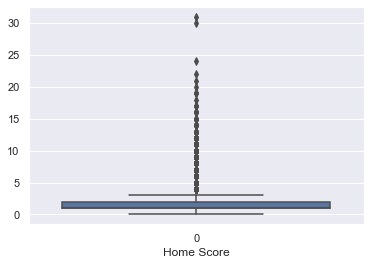

In [24]:
sns.boxplot(data=df['home_score'])
_ = plt.xlabel("Home Score")

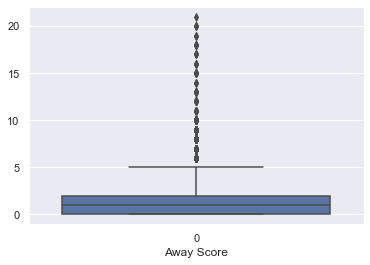

In [25]:
sns.boxplot(data=df['away_score'])
_ = plt.xlabel("Away Score")

We can clearly see that there are no concerning values since all the scores are positive and the values seem to be possible 

#### Exporting Dataframes as pickles

In [26]:
df.to_pickle('International_Results.pkl')

In [27]:
int_df.to_pickle("Major_International_Results.pkl")

In [28]:
fifa_df.to_pickle("FIFA_International_Results.pkl")

________________________


## Dataset 2: World Cup

In [29]:
df2 = pd.read_csv('WorldCupMatches.csv')
df2.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [30]:
df3 = pd.read_csv('WorldCups.csv')
df3.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [32]:
df3['avg goals'] = df3['GoalsScored'] / df3['MatchesPlayed']
df3

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,avg goals
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246,4.000000
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810,3.600000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172,2.781250
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135,2.781250
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975,2.968750
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753,2.552632


In [248]:
html = df3.head().to_html()
html = html.replace("\n","")
html

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Year</th>      <th>Country</th>      <th>Winner</th>      <th>Runners-Up</th>      <th>Third</th>      <th>Fourth</th>      <th>GoalsScored</th>      <th>QualifiedTeams</th>      <th>MatchesPlayed</th>      <th>Attendance</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1930</td>      <td>Uruguay</td>      <td>Uruguay</td>      <td>Argentina</td>      <td>USA</td>      <td>Yugoslavia</td>      <td>70</td>      <td>13</td>      <td>18</td>      <td>590.549</td>    </tr>    <tr>      <th>1</th>      <td>1934</td>      <td>Italy</td>      <td>Italy</td>      <td>Czechoslovakia</td>      <td>Germany</td>      <td>Austria</td>      <td>70</td>      <td>16</td>      <td>17</td>      <td>363.000</td>    </tr>    <tr>      <th>2</th>      <td>1938</td>      <td>France</td>      <td>Italy</td>      <td>Hungary</td>      <td>Brazil</td>      <td>Sweden</td>      <td>84</td> 

#### NaN Values

Let's take a look out for NaN values in our dataset.

In [249]:
df2[df2.isna().any(axis=1)].head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [250]:
df3.isna().any()

Year              False
Country           False
Winner            False
Runners-Up        False
Third             False
Fourth            False
GoalsScored       False
QualifiedTeams    False
MatchesPlayed     False
Attendance        False
dtype: bool

As you can see,df3 does not have any NaN values while for df2, we have some rows which are completely NaN as well as the Attendance column have NaN values.

Therefore, we can drop all the rows containing all the NaN values. We will deal with Attendance later.

In [251]:
df2 = df2.drop(df2[df2.isna().all(axis=1)].index)

In [252]:
df2[df2.isna().any(axis=1)]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG
841,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


We can see that only the Attendance NaN values are remaining. Let's leave that for now

#### Removing unnecessary columns

For df2, we only need the Datetime,Home Team Name, Away Team Name and Win conditions columns so let's extract those

In [253]:
df2 = df2[['Datetime','Home Team Name', 'Away Team Name', 'Win conditions']]
df2.head()

,Datetime,Home Team Name,Away Team Name,Win conditions
0,13 Jul 1930 - 15:00,France,Mexico,
1,13 Jul 1930 - 15:00,USA,Belgium,
2,14 Jul 1930 - 12:45,Yugoslavia,Brazil,
3,14 Jul 1930 - 14:50,Romania,Peru,
4,15 Jul 1930 - 16:00,Argentina,France,


For df3, we only need the year, Winner, Runners-Up, Third and Fourth columns

In [254]:
df3 = df3[['Year','Winner','Runners-Up','Third','Fourth']]
df3.head()

,Year,Winner,Runners-Up,Third,Fourth
0,1930,Uruguay,Argentina,USA,Yugoslavia
1,1934,Italy,Czechoslovakia,Germany,Austria
2,1938,Italy,Hungary,Brazil,Sweden
3,1950,Uruguay,Brazil,Sweden,Spain
4,1954,Germany FR,Hungary,Austria,Uruguay


#### Fixing Datatypes

First, let's take a look at the df2 datatypes:
1. **Datetime** : Contains the date and time of the match
2. **Home Team Name** : Name of the home team in the match 
3. **Away Team Name** : Name of the away team in the match 
4. **Win conditions** : The winning condition such as extra time / penalty shootout

In [255]:
df2.head()

,Datetime,Home Team Name,Away Team Name,Win conditions
0,13 Jul 1930 - 15:00,France,Mexico,
1,13 Jul 1930 - 15:00,USA,Belgium,
2,14 Jul 1930 - 12:45,Yugoslavia,Brazil,
3,14 Jul 1930 - 14:50,Romania,Peru,
4,15 Jul 1930 - 16:00,Argentina,France,


In [256]:
df2.dtypes

Datetime          object
Home Team Name    object
Away Team Name    object
Win conditions    object
dtype: object

We need to convert the datetime column to a data type of datetime.

We only need the day , month and year. For that, we will first split the column by the - to extract out the day month and year only. After that , we will set those to a datetime column

In [257]:
date_li = df2['Datetime'].str.split(r'-')
sep_date = date_li.str.split(r'')
dt_df = pd.DataFrame({
    'Datetime' : date_li.str[0]
})

sep_date = dt_df["Datetime"].str.split(r' ')
date_df = pd.DataFrame({
    'Day' : sep_date.str[0],
    'Month': sep_date.str[1],
    'Year': sep_date.str[2]
})

There is some consistency issues with Jul and July as well as Jun and June so we need to fix them . Additionally, we need to convert the months to their numeric representation. For that , we will make a dictionary of all the months present in the dataframe and map that to all Months.

In [258]:
date_df['Month'] = date_df['Month'].replace(to_replace="Jul",value="July")
date_df['Month'] = date_df['Month'].replace(to_replace="Jun",value="June")

In [259]:
date_df['Month'].unique()

array(['July', 'May', 'June'], dtype=object)

In [260]:
months = {"May" : 5, "June" : 6 , 'July' : 7}
def num_month(m):
    return months[m]

date_df['Month'] = date_df['Month'].apply(num_month)

In [261]:
df2['Datetime'] = pd.to_datetime(date_df)

In [262]:
df2.dtypes

Datetime          datetime64[ns]
Home Team Name            object
Away Team Name            object
Win conditions            object
dtype: object

_________________

Next, let's take a look at df3:
1. **Year** : The year of the World Cup. 
2. **Winner**: Winner of the World Cup. 
3. **Runners-Up**: Runner-Up of the World Cup. 
4. **Third**: Third place of the world Cup 
5. **Fourth**: Fourth place of the world Cup

In [263]:
df3.dtypes

Year           int64
Winner        object
Runners-Up    object
Third         object
Fourth        object
dtype: object

For this, we notice that the Year is not datetime. One might think about converting it to datetime, however, since we do not need any of the month or day components, therefore , we can leave it as int since the years can be compared as numbers as well. 

_________________

#### Filtering Datasets

Here we will filter our datasets so that they only contain data that is useful for answering our questions.

df3 is already filtered so we only need to look at df2.

For df2, we need win conditions where the team won on a penalty shootout so we will filter those rows.

In [264]:
penalties_df = df2[df2['Win conditions'].str.contains('penalties')]

In [265]:
penalties_df.dtypes

Datetime          datetime64[ns]
Home Team Name            object
Away Team Name            object
Win conditions            object
dtype: object

#### Fixing Data consistencies

Finally, we need to clear up the data inconsistencies in our datasets. 
First of all, we will take a look at our penalties dataframe

In [191]:
penalties_df['Home Team Name'].unique()

array(['Germany FR', 'Brazil', 'Spain', 'rn">Republic of Ireland',
       'Yugoslavia', 'Italy', 'Mexico', 'Romania', 'Argentina',
       'Switzerland', 'Germany', 'England', 'Paraguay', 'Uruguay',
       'Netherlands', 'Costa Rica'], dtype=object)

In [192]:
penalties_df['Away Team Name'].unique()

array(['France', 'Mexico', 'Belgium', 'Romania', 'Argentina', 'England',
       'Bulgaria', 'Sweden', 'Italy', 'Netherlands',
       'rn">Republic of Ireland', 'Korea Republic', 'Ukraine', 'Portugal',
       'Japan', 'Ghana', 'Chile', 'Costa Rica', 'Greece'], dtype=object)

In the team name columns, we notice some inconsistencies:
1. rn">Republic of Ireland
2. Germany FR , Yugoslavia

For the first problem we just remove the _rn">_ from all instances of Republic of Ireland

In [193]:
penalties_df = penalties_df.replace(to_replace='rn">Republic of Ireland',value="Republic of Ireland")

Now moving onto the second issue. Yugoslavia does not exist anymore as it was divided. 
As for Germany, Germany FR was updated to Germany after reunification , so we have decided to change it to just Germany. 

In [194]:
penalties_df = penalties_df.replace(to_replace="Germany FR",value="Germany",regex=True)

Another issue that we see is that some of the win conditions are missing. So let's fix that as well

In [195]:
penalties_df.head()

,Datetime,Home Team Name,Away Team Name,Win conditions
357,1982-07-08,Germany,France,win on penalties (5 - 4)
404,1986-06-21,Brazil,France,France win on penalties (3 - 4)
405,1986-06-21,Germany,Mexico,Germany win on penalties (4 - 1)
406,1986-06-22,Spain,Belgium,Belgium win on penalties (4 - 5)
452,1990-06-25,Republic of Ireland,Romania,Republic of Ireland win on penalties (5 - 4)


In [266]:
split = penalties_df['Win conditions'].str.split('[\(\-\)]')
home_pens = pd.DataFrame({
    "Home_pen_score" : split.str[1] 
})
away_pens = pd.DataFrame({
    "Away_pen_score" : split.str[2]
})
penalties_df['Home_pen_score'] = home_pens['Home_pen_score']
penalties_df['Away_pen_score'] = away_pens['Away_pen_score']

/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ediot/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [267]:
penalties_df = penalties_df.astype({'Home_pen_score' : 'int64', 'Away_pen_score' : 'int64'})

In [268]:
winner_li = []
for (index,val) in penalties_df['Home_pen_score'].iteritems():
    cnd = (penalties_df.loc[index,['Home_pen_score']].item() > penalties_df.loc[index,['Away_pen_score']].item())
    if (cnd):
        winner_li.append(penalties_df.loc[index,['Home Team Name']].item())
    else:
        winner_li.append(penalties_df.loc[index,['Away Team Name']].item())
        
ps_winner = pd.DataFrame({
    'Winner' : winner_li
})
penalties_df = penalties_df.reset_index()
penalties_df = penalties_df.drop(['index'],axis=1)
penalties_df['Winner'] = ps_winner
penalties_df

,Datetime,Home Team Name,Away Team Name,Win conditions,Home_pen_score,Away_pen_score,Winner
0,1982-07-08,Germany FR,France,win on penalties (5 - 4),5,4,Germany FR
1,1986-06-21,Brazil,France,France win on penalties (3 - 4),3,4,France
2,1986-06-21,Germany FR,Mexico,Germany FR win on penalties (4 - 1),4,1,Germany FR
3,1986-06-22,Spain,Belgium,Belgium win on penalties (4 - 5),4,5,Belgium
4,1990-06-25,"rn"">Republic of Ireland",Romania,Republic of Ireland win on penalties (5 - 4),5,4,"rn"">Republic of Ireland"
5,1990-06-30,Yugoslavia,Argentina,win on penalties (2 - 3),2,3,Argentina
6,1990-07-03,Italy,Argentina,win on penalties (3 - 4),3,4,Argentina
7,1990-07-04,Germany FR,England,win on penalties (4 - 3),4,3,Germany FR
8,1994-07-05,Mexico,Bulgaria,Bulgaria win on penalties (1 - 3),1,3,Bulgaria
9,1994-07-10,Romania,Sweden,Sweden win on penalties (4 - 5),4,5,Sweden


We can also see that the last 4 records are repeated so we delete those as well as the win condition column since we have extracted the relevent data out of it .

In [270]:
penalties_df.dtypes

Datetime          datetime64[ns]
Home Team Name            object
Away Team Name            object
Home_pen_score             int64
Away_pen_score             int64
Winner                    object
dtype: object

In [269]:
penalties_df = penalties_df.drop([26,27,28,29])
penalties_df = penalties_df.drop(['Win conditions'],axis=1)
penalties_df

,Datetime,Home Team Name,Away Team Name,Home_pen_score,Away_pen_score,Winner
0,1982-07-08,Germany FR,France,5,4,Germany FR
1,1986-06-21,Brazil,France,3,4,France
2,1986-06-21,Germany FR,Mexico,4,1,Germany FR
3,1986-06-22,Spain,Belgium,4,5,Belgium
4,1990-06-25,"rn"">Republic of Ireland",Romania,5,4,"rn"">Republic of Ireland"
5,1990-06-30,Yugoslavia,Argentina,2,3,Argentina
6,1990-07-03,Italy,Argentina,3,4,Argentina
7,1990-07-04,Germany FR,England,4,3,Germany FR
8,1994-07-05,Mexico,Bulgaria,1,3,Bulgaria
9,1994-07-10,Romania,Sweden,4,5,Sweden


In [200]:
df3 = df3.replace('Germany FR',"Germany")

In [201]:
df3

,Year,Winner,Runners-Up,Third,Fourth
0,1930,Uruguay,Argentina,USA,Yugoslavia
1,1934,Italy,Czechoslovakia,Germany,Austria
2,1938,Italy,Hungary,Brazil,Sweden
3,1950,Uruguay,Brazil,Sweden,Spain
4,1954,Germany,Hungary,Austria,Uruguay
5,1958,Brazil,Sweden,France,Germany
6,1962,Brazil,Czechoslovakia,Chile,Yugoslavia
7,1966,England,Germany,Portugal,Soviet Union
8,1970,Brazil,Italy,Germany,Uruguay
9,1974,Germany,Netherlands,Poland,Brazil


In [202]:
penalties_df.to_pickle("Penalty_Results.pkl")

In [203]:
df3.to_pickle('World Cup Results.pkl')

In [204]:
tmp = pd.read_pickle('International_Results.pkl')
tmp

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,False
1,1873-03-08,England,Scotland,4,2,Friendly,False
2,1874-03-07,Scotland,England,2,1,Friendly,False
3,1875-03-06,England,Scotland,2,2,Friendly,False
4,1876-03-04,Scotland,England,3,0,Friendly,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,False
6,1877-03-03,England,Scotland,1,3,Friendly,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,False
8,1878-03-02,Scotland,England,7,2,Friendly,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,False
